In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_train=pd.read_csv('C:/Users/Daksh Pruthi/Desktop/Uni/CS 513/archive/aug_train.csv')
data_test=pd.read_csv('C:/Users/Daksh Pruthi/Desktop/Uni/CS 513/archive/aug_test.csv')

In [3]:
data_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
data_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
print(data_train.shape)
print(data_test.shape)

(19158, 14)
(2129, 13)


In [6]:
print(data_train.columns)

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


In [7]:
data_train['company_size'] = data_train['company_size'].replace('10/49','10-49')

In [8]:
data_train['target']

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

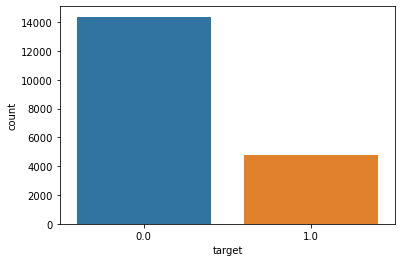

In [9]:

sns.countplot(x='target',data=data_train)

In [10]:
# Finding the missing values in train and test dataset
data_missing=pd.DataFrame({'Missing Count':data_train.isnull().sum(),'Missing Percentage':data_train.isnull().sum()*100/data_train.shape[0]})

In [11]:
data_missing

,Missing Count,Missing Percentage
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885


In [12]:
data_missing_test=pd.DataFrame({'Missing Count':data_test.isnull().sum(),'Missing Percentage':data_test.isnull().sum()*100/data_test.shape[0]})

In [13]:
data_missing_test

,Missing Count,Missing Percentage
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,508,23.860968
relevent_experience,0,0.000000
enrolled_university,31,1.456083
education_level,52,2.442461
major_discipline,312,14.654767
experience,5,0.234852
company_size,622,29.215594


In [14]:
data_train.drop(['enrollee_id'],axis=1,inplace=True)
data_train.shape

(19158, 13)

In [15]:
data_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
to_LabelEncode = data_train[['gender', 'relevent_experience','enrolled_university', 'education_level', 'major_discipline','experience', 'company_size', 'company_type', 'last_new_job','city']]

In [17]:
to_LabelEncode.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,city_103
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,city_40
2,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,city_21
3,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,city_115
4,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,city_162


In [18]:
label_encoder = LabelEncoder()
df_temp = to_LabelEncode.astype("str").apply(label_encoder.fit_transform)
df_final = df_temp.where(~to_LabelEncode.isna(), to_LabelEncode)

In [19]:
df_final.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city
0,1,0,3,0,5,21,NaN,NaN,0,5
1,1,1,3,0,5,6,4,5,4,77
2,NaN,1,0,0,5,15,NaN,NaN,6,64
3,NaN,1,NaN,0,1,20,NaN,5,6,14
4,1,0,3,2,5,21,4,1,3,50


In [20]:
data_train.drop(['gender', 'relevent_experience','enrolled_university', 'education_level', 'major_discipline','experience', 'company_size', 'company_type', 'last_new_job','city'],axis=1,inplace=True)

In [21]:
data_train.head()

,city_development_index,training_hours,target
0,0.920,36,1.0
1,0.776,47,0.0
2,0.624,83,0.0
3,0.789,52,1.0
4,0.767,8,0.0


In [22]:
df_data = df_final.join(data_train)
df_data.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,training_hours,target
0,1,0,3,0,5,21,NaN,NaN,0,5,0.920,36,1.0
1,1,1,3,0,5,6,4,5,4,77,0.776,47,0.0
2,NaN,1,0,0,5,15,NaN,NaN,6,64,0.624,83,0.0
3,NaN,1,NaN,0,1,20,NaN,5,6,14,0.789,52,1.0
4,1,0,3,2,5,21,4,1,3,50,0.767,8,0.0


In [23]:
X_df_data_train=df_data.iloc[:,:12]
y_df_data_train=df_data.iloc[:,12:]

In [24]:
X_df_data_train

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,training_hours
0,1,0,3,0,5,21,NaN,NaN,0,5,0.920,36
1,1,1,3,0,5,6,4,5,4,77,0.776,47
2,NaN,1,0,0,5,15,NaN,NaN,6,64,0.624,83
3,NaN,1,NaN,0,1,20,NaN,5,6,14,0.789,52
4,1,0,3,2,5,21,4,1,3,50,0.767,8
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,1,1,3,0,2,5,NaN,NaN,0,55,0.878,42
19154,1,0,3,0,5,5,NaN,NaN,3,5,0.920,52
19155,1,0,3,0,5,21,4,5,3,5,0.920,44
19156,1,0,3,1,NaN,20,5,5,1,94,0.802,97


In [25]:
y_df_data_train

,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
19153,1.0
19154,1.0
19155,0.0
19156,0.0


# MICE or Iterative Imputer

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
mice_imputer = IterativeImputer(random_state=42, estimator=lr, 
                                max_iter=10, n_nearest_features=2, imputation_order = 'roman')
final_df = mice_imputer.fit_transform(df_data)

final_df = pd.DataFrame(final_df)
print(final_df.shape)
final_df.columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 
                    'major_discipline','experience', 'company_size', 'company_type', 
                    'last_new_job', 'city_development_index', 'training_hours','city','target']
                                                        
final_df.shape

(19158, 13)


C:\Users\Daksh Pruthi\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


(19158, 13)

In [27]:
final_df.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,city,target
0,1.000000,0.0,3.000000,0.0,5.0,21.0,3.038666,4.087266,0.0,5.0,0.920,36.0,1.0
1,1.000000,1.0,3.000000,0.0,5.0,6.0,4.000000,5.000000,4.0,77.0,0.776,47.0,0.0
2,0.937383,1.0,0.000000,0.0,5.0,15.0,3.144270,4.753417,6.0,64.0,0.624,83.0,0.0
3,0.854839,1.0,1.991425,0.0,1.0,20.0,3.156153,5.000000,6.0,14.0,0.789,52.0,1.0
4,1.000000,0.0,3.000000,2.0,5.0,21.0,4.000000,1.000000,3.0,50.0,0.767,8.0,0.0


In [28]:
final_df["target"].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [29]:
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

count_percent(final_df)

,Count Missing,Percent Missing
gender,0,0.0
relevent_experience,0,0.0
enrolled_university,0,0.0
education_level,0,0.0
major_discipline,0,0.0
experience,0,0.0
company_size,0,0.0
company_type,0,0.0
last_new_job,0,0.0
city_development_index,0,0.0


## Data is imbalanced so we try to balance the data

In [30]:
y_true = final_df["target"]
final_df["target"].value_counts(normalize=True)

0.0    0.750652
1.0    0.249348
Name: target, dtype: float64

In [31]:
from imblearn.over_sampling import SMOTE,ADASYN, SVMSMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

X = final_df.drop('target',1)
y = final_df.target

svm_smote = SMOTE( random_state=101) #,sampling_strategy='minority', k_neighbors=5)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X,y)

X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.30, random_state=101)

sc = StandardScaler()
X_train = sc.fit_transform(X_train_svm)
X_test = sc.transform(X_test_svm)

C:\Users\Daksh Pruthi\AppData\Local\Temp\ipykernel_23264\790276195.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = final_df.drop('target',1)


# now data is balanced and features are scaled 

In [32]:
X_train

array([[ 0.29154607,  1.56426405, -0.37021886, ..., -1.16753916,
         0.87502646, -0.77538948],
       [ 0.29154607, -0.70728262,  0.67190689, ..., -1.16753916,
         0.87502646,  1.11932929],
       [ 0.05126482,  1.26253581,  0.67190689, ..., -1.16753916,
         0.87502646, -0.1507831 ],
       ...,
       [-0.11784332, -0.70728262,  0.67190689, ...,  0.10506407,
         0.87502646, -0.6991011 ],
       [ 0.29154607, -0.70728262, -1.76788709, ...,  0.53890608,
        -1.37270076,  0.48538108],
       [ 0.29154607,  1.56426405,  0.67190689, ..., -0.93615676,
         0.9205885 , -0.56563832]])

In [33]:
y_train.value_counts()

1.0    10098
0.0    10035
Name: target, dtype: int64

In [34]:
y_test.value_counts()

0.0    4346
1.0    4283
Name: target, dtype: int64

In [35]:
list1=[]

# Naive bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

GNB=GaussianNB()

GNB.fit(X_train,y_train)

GaussianNB()

In [37]:
y_pred=GNB.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 0., 1.])

In [38]:
from sklearn.metrics import accuracy_score

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.6821


In [39]:
y_pred_train=GNB.predict(X_train)

In [40]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Accuracy Score: 0.6831


In [41]:
ac1 = accuracy_score(y_test,y_pred)
list1.append(ac1)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67      4346
         1.0       0.67      0.71      0.69      4283

    accuracy                           0.68      8629
   macro avg       0.68      0.68      0.68      8629
weighted avg       0.68      0.68      0.68      8629




# KNN MODEL

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac2 = accuracy_score(y_test,y_pred)

In [46]:
ac2

0.7745972882141615

In [47]:
list1.append(ac2)

In [48]:
cm

array([[3125, 1221],
       [ 724, 3559]], dtype=int64)

# Logistic regresssion

In [49]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred_le=lr.predict(X_test)

In [51]:


y_pred_le.shape

(8629,)

In [52]:
y_test.shape

(8629,)

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score
#cm1 = confusion_matrix(y_test, y_pred_le)
ac3 = accuracy_score(y_test,y_pred_le)

In [54]:
ac3

0.6913895005214973

In [55]:
list1.append(ac3)

# Decison tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
#criterion parameter can be entropy or gini. Impurity will increase #while the entropy and gini index value decrease
classifier4 = DecisionTreeClassifier(criterion='entropy',random_state=0) 
classifier4.fit(X_train,y_train)
#6 Predicting the Test set results
y_pred4 = classifier.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm6 = confusion_matrix(y_test, y_pred4)
ac4 = accuracy_score(y_test,y_pred4)

In [58]:
ac4

0.7745972882141615

In [59]:
list1.append(ac4)

# XGB Classifier

In [60]:
from xgboost import XGBClassifier


C:\Users\Daksh Pruthi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [61]:
xgbc=XGBClassifier()
xgbc.fit(X_train,y_train)

C:\Users\Daksh Pruthi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:33:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
score=xgbc.score(X_train,y_train)

In [63]:
score

0.9304127551780659

In [64]:
y_pred=xgbc.predict(X_test)


In [65]:
ac5=accuracy_score(y_test,y_pred)

In [66]:
ac5

0.8766948661490324

In [67]:
list1.append(ac5)

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [69]:
ac6=accuracy_score(y_test,y_pred)

In [70]:
ac6

0.8704368988295283

In [71]:
list1.append(ac6)

# Light Gradient Boosting

In [72]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
clf_lgb = lgb.LGBMClassifier()
clf_lgb.fit(X_train, y_train)
y_pred=clf_lgb.predict(X_test)

In [73]:
ac7=accuracy_score(y_test,y_pred)

In [74]:
ac7

0.8820257271989802

In [75]:
list1.append(ac7)

# Artificial Neural network

In [76]:
!pip install tensorflow-cpu
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)


In [90]:
ann2=tf.keras.models.Sequential()
ann2.add(tf.keras.layers.Dense(units=64,activation="relu"))
ann2.add(tf.keras.layers.Dense(units=32,activation="relu"))
ann2.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann2.add(tf.keras.layers.Dense(units=12,activation="relu"))
ann2.add(tf.keras.layers.Dense(units=15,activation="relu"))
ann2.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [91]:
ann2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
ann2.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
630/630 [==============================] - 2s 2ms/step - loss: 0.5793 - accuracy: 0.7000
Epoch 2/100
630/630 [==============================] - 1s 2ms/step - loss: 0.5284 - accuracy: 0.7491
Epoch 3/100
630/630 [==============================] - 1s 2ms/step - loss: 0.5089 - accuracy: 0.7626
Epoch 4/100
630/630 [==============================] - 1s 2ms/step - loss: 0.4905 - accuracy: 0.7747
Epoch 5/100
630/630 [==============================] - 1s 2ms/step - loss: 0.4747 - accuracy: 0.7803
Epoch 6/100
630/630 [==============================] - 1s 2ms/step - loss: 0.4657 - accuracy: 0.7842
Epoch 7/100
630/630 [==============================] - 1s 2ms/step - loss: 0.4572 - accuracy: 0.7869
Epoch 8/100
630/630 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.7913
Epoch 9/100
630/630 [==============================] - 1s 2ms/step - loss: 0.4436 - accuracy: 0.7963
Epoch 10/100
630/630 [==============================] - 1s 2ms/step - loss: 0.4402 - accura

630/630 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8516
Epoch 82/100
630/630 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8505
Epoch 83/100
630/630 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8510
Epoch 84/100
630/630 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8516
Epoch 85/100
630/630 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.8539
Epoch 86/100
630/630 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8499
Epoch 87/100
630/630 [==============================] - 1s 1ms/step - loss: 0.3324 - accuracy: 0.8539
Epoch 88/100
630/630 [==============================] - 1s 1ms/step - loss: 0.3324 - accuracy: 0.8561
Epoch 89/100
630/630 [==============================] - 1s 1ms/step - loss: 0.3353 - accuracy: 0.8511
Epoch 90/100
630/630 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 

In [93]:
y_pred10 = ann2.predict(X_test)

270/270 [==============================] - 0s 1ms/step


In [94]:
type(y_pred10)

numpy.ndarray

In [95]:
type(y_test)

pandas.core.series.Series

In [96]:
y_pred10 = (y_pred10 > 0.5)

In [97]:
y_pred10

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred10)

0.7946459612933132

In [99]:
ac8=accuracy_score(y_test,y_pred10)

In [100]:
ac8

0.7946459612933132

In [101]:
list1.append(ac8)

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred10))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      4346
         1.0       0.79      0.79      0.79      4283

    accuracy                           0.79      8629
   macro avg       0.79      0.79      0.79      8629
weighted avg       0.79      0.79      0.79      8629



In [104]:
print (list1)

[0.6821184378259358, 0.7745972882141615, 0.6913895005214973, 0.7745972882141615, 0.8766948661490324, 0.8704368988295283, 0.8820257271989802, 0.7929076370378955, 0.7946459612933132]
